# Installation / Setup

## Install spacY and News API thru *pip*

In [1]:
!pip install spacy
!pip install newsapi-python

## Download the spaCy English Language Model

In [2]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


## Import the spaCy model and save as *nlp_eng*

In [3]:
import spacy
from newsapi import NewsApiClient

nlp_eng = spacy.load('en_core_web_lg')
#Able to get the API Key thru https://newsapi.org/
newsapi = NewsApiClient (api_key='I_REMOVED_THE_API_KEY_SORRY')

# Coding

## Retrieving API Data about coronavirus

In [4]:
topic = 'coronavirus'

def getSomething(x):
    temp = newsapi.get_everything(q=topic, language='en', 
                                  from_param='2020-09-27', to='2020-10-27', 
                                  sort_by='relevancy', page=x)
    return temp

articles = list(map(getSomething, range(1,6)))

## Saving Articles (binary) just in case

In [5]:
import pickle

filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))

## Retrieving Articles from file

In [6]:
import pickle

filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

## Transforming into Pandas Dataframe and Cleaning Data

In [7]:
import pandas as pd

dados = []

articles = loaded_model

for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
        
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,"Sorry, Mouthwash Isn't a Coronavirus Cure",2020-10-21T19:45:00Z,Mouthwash is designed to kill germs in your mo...,Mouthwash is designed to kill germs in your mo...
1,Check an Airline's Coronavirus Policies Before...,2020-10-21T16:00:00Z,Navigating air travel during the COVID-19 pand...,Navigating air travel during the COVID-19 pand...
2,"Twitter flags, limits sharing on Trump tweet a...",2020-10-11T19:11:34Z,Twitter disabled sharing options on a tweet fr...,The tweet violated the platforms rules against...
3,Coronavirus and Home Design,2020-10-22T13:00:08Z,A recent survey of architects reveals that cli...,The coronavirus pandemic is already shaping ho...
4,Coronavirus Briefing: What Happened Today,2020-10-12T22:12:24Z,What the near future may hold,Many leaders most notably President Trump have...


## Defining the keyword method

In [8]:
pos_tag = ['VERB', 'NOUN', 'PROPN']
punctuation = [',', '.', '?', '!', ':', ';', '-', '\"', '\'']

def get_keywords_eng(content):
    result = []
    
    for token in nlp_eng(content):
        if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
          continue
        if (token.pos_ in pos_tag):
          result.append(token.text)
    
    return result

## Applying the method to all news articles

In [9]:
from collections import Counter

results = []

for content in df.content.values:
    results.append([('#' + x[0]) 
                    for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results

## Display head of result

In [10]:
df.head()

,title,date,desc,content,keywords
0,"Sorry, Mouthwash Isn't a Coronavirus Cure",2020-10-21T19:45:00Z,Mouthwash is designed to kill germs in your mo...,Mouthwash is designed to kill germs in your mo...,"[#Mouthwash, #designed, #kill, #germs, #mouth]"
1,Check an Airline's Coronavirus Policies Before...,2020-10-21T16:00:00Z,Navigating air travel during the COVID-19 pand...,Navigating air travel during the COVID-19 pand...,"[#Navigating, #air, #travel, #COVID-19, #pande..."
2,"Twitter flags, limits sharing on Trump tweet a...",2020-10-11T19:11:34Z,Twitter disabled sharing options on a tweet fr...,The tweet violated the platforms rules against...,"[#tweet, #sharing, #violated, #platforms, #rules]"
3,Coronavirus and Home Design,2020-10-22T13:00:08Z,A recent survey of architects reveals that cli...,The coronavirus pandemic is already shaping ho...,"[#pandemic, #coronavirus, #shaping, #home, #de..."
4,Coronavirus Briefing: What Happened Today,2020-10-12T22:12:24Z,What the near future may hold,Many leaders most notably President Trump have...,"[#leaders, #President, #Trump, #described, #ar..."


# Conclusion

## Display Wordcloud

In [11]:
!pip install wordcloud

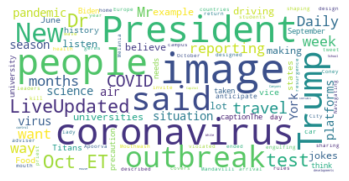

In [12]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(np.array(results).flatten())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Export dataset as a *.xlsx* file

In [13]:
df.to_excel("datasetCOVID19.xlsx")